In [38]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

output_dir = "myLearningData/savefig/4line/LargeData/fine"  # 저장할 폴더 이름
if not os.path.exists(output_dir): # 폴더가 없는 경우 폴더를 생성합니다.
    os.makedirs(output_dir)
data = '240305_1243_4line_I2C'
dataname = data+'MLP_PReLU'
filename = 'myData/'+data+'.csv'
SD1 = pd.read_csv(filename)
SD1=SD1.iloc[:,:52]
SensorData1 = SD1

In [39]:
SD1.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx42,Sx43,Sx44,Sx45,Sx46,Sx47,Force,z,theta,r
count,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,...,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000
mean,0.211503,-0.978109,-0.991308,0.209997,0.729332,2.436806,1.194822,-0.535810,1.032716,-0.590224,...,0.845725,0.408075,0.223716,0.223716,-0.326752,-0.246369,1.707992,79.484014,177.382923,6.464494
std,1.179793,1.277059,0.999396,0.960318,1.017572,1.810424,2.544222,1.093245,0.991677,2.195692,...,1.122432,1.057709,1.060110,1.060110,1.100551,1.105812,0.987701,39.215867,104.359757,2.292959
min,-15.600000,-15.400000,-14.900000,-12.900000,-13.800000,-12.500000,-17.500000,-13.700000,-13.800000,-20.000000,...,-14.900000,-15.200000,-14.800000,-14.800000,-17.400000,-15.900000,-5.003600,16.000000,0.000000,3.000000
25%,-0.200000,-1.600000,-1.400000,-0.200000,0.300000,1.400000,-0.400000,-1.100000,0.600000,-0.600000,...,0.300000,0.000000,-0.200000,-0.200000,-0.800000,-0.700000,1.113300,48.000000,85.000000,4.000000
50%,0.300000,-0.900000,-0.900000,0.300000,0.800000,2.800000,1.300000,-0.500000,1.100000,-0.200000,...,0.900000,0.500000,0.300000,0.300000,-0.200000,-0.100000,1.747600,80.000000,175.000000,6.000000
75%,0.800000,-0.200000,-0.500000,0.700000,1.300000,3.700000,2.900000,0.100000,1.600000,0.100000,...,1.500000,1.000000,0.800000,0.800000,0.300000,0.400000,2.484100,112.000000,270.000000,8.000000
max,3.600000,3.300000,1.600000,4.200000,3.600000,7.400000,11.300000,2.900000,4.100000,3.500000,...,4.800000,4.800000,4.000000,4.000000,3.100000,2.800000,3.681400,144.000000,355.000000,10.000000


In [40]:
SDreal = SD1
#SDreal["z"] *= 2

In [41]:
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx42,Sx43,Sx44,Sx45,Sx46,Sx47,Force,z,theta,r
count,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,...,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000
mean,0.211503,-0.978109,-0.991308,0.209997,0.729332,2.436806,1.194822,-0.535810,1.032716,-0.590224,...,0.845725,0.408075,0.223716,0.223716,-0.326752,-0.246369,1.707992,79.484014,177.382923,6.464494
std,1.179793,1.277059,0.999396,0.960318,1.017572,1.810424,2.544222,1.093245,0.991677,2.195692,...,1.122432,1.057709,1.060110,1.060110,1.100551,1.105812,0.987701,39.215867,104.359757,2.292959
min,-15.600000,-15.400000,-14.900000,-12.900000,-13.800000,-12.500000,-17.500000,-13.700000,-13.800000,-20.000000,...,-14.900000,-15.200000,-14.800000,-14.800000,-17.400000,-15.900000,-5.003600,16.000000,0.000000,3.000000
25%,-0.200000,-1.600000,-1.400000,-0.200000,0.300000,1.400000,-0.400000,-1.100000,0.600000,-0.600000,...,0.300000,0.000000,-0.200000,-0.200000,-0.800000,-0.700000,1.113300,48.000000,85.000000,4.000000
50%,0.300000,-0.900000,-0.900000,0.300000,0.800000,2.800000,1.300000,-0.500000,1.100000,-0.200000,...,0.900000,0.500000,0.300000,0.300000,-0.200000,-0.100000,1.747600,80.000000,175.000000,6.000000
75%,0.800000,-0.200000,-0.500000,0.700000,1.300000,3.700000,2.900000,0.100000,1.600000,0.100000,...,1.500000,1.000000,0.800000,0.800000,0.300000,0.400000,2.484100,112.000000,270.000000,8.000000
max,3.600000,3.300000,1.600000,4.200000,3.600000,7.400000,11.300000,2.900000,4.100000,3.500000,...,4.800000,4.800000,4.000000,4.000000,3.100000,2.800000,3.681400,144.000000,355.000000,10.000000


In [42]:
# SDreal 값이 999이거나 100이상인 이상치 제거
#SDreal = SDreal[~(SDreal == 999).any(axis=1)]

# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

# 'Force', 'theta', 'z', 'r' 열을 제외한 열에서 100 이상의 값을 제거
#cols_to_exclude = ["Force", "theta", "z", "r"]
#cols_to_check = [col for col in SDreal.columns if col not in cols_to_exclude]

SDreal = SDreal[~((SDreal <= 0) & (SDreal.columns == "Force")).any(axis=1)]

SDreal = SDreal[SDreal["r"] >= 4]
SDreal = SDreal[SDreal["z"] <= 160]
SDreal = SDreal[SDreal["z"] >= 0]

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()


,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx44,Sx45,Sx46,Sx47,Force,z,theta,r,cos,sin
count,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,...,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,159845.000000,1.598450e+05,1.598450e+05
mean,0.208698,-0.994927,-0.993591,0.213091,0.731965,2.436122,1.204831,-0.518677,1.033143,-0.594545,...,0.228553,0.228553,-0.325640,-0.253248,1.958742,79.469836,177.298633,6.976008,1.049578e-02,3.541146e-04
std,1.222116,1.311099,1.034551,0.991391,1.043773,1.826821,2.548838,1.119488,1.020175,2.308632,...,1.093730,1.093730,1.134632,1.142252,0.794000,39.213044,104.384622,2.000052,7.021528e-01,7.119533e-01
min,-15.600000,-15.400000,-14.900000,-12.900000,-13.800000,-12.500000,-17.500000,-13.700000,-13.800000,-20.000000,...,-14.800000,-14.800000,-17.400000,-15.900000,0.004600,16.000000,0.000000,4.000000,-1.000000e+00,-1.000000e+00
25%,-0.200000,-1.600000,-1.400000,-0.200000,0.300000,1.400000,-0.400000,-1.000000,0.600000,-0.600000,...,-0.300000,-0.300000,-0.800000,-0.700000,1.344800,48.000000,85.000000,5.000000,-7.071068e-01,-7.071068e-01
50%,0.300000,-0.900000,-0.900000,0.300000,0.800000,2.800000,1.300000,-0.400000,1.100000,-0.200000,...,0.300000,0.300000,-0.200000,-0.100000,1.921400,80.000000,175.000000,7.000000,6.123234e-17,1.224647e-16
75%,0.800000,-0.200000,-0.400000,0.800000,1.300000,3.700000,2.900000,0.100000,1.600000,0.200000,...,0.900000,0.900000,0.300000,0.400000,2.587700,112.000000,270.000000,9.000000,7.071068e-01,7.071068e-01
max,3.600000,3.300000,1.600000,4.200000,3.600000,7.400000,11.300000,2.900000,4.100000,3.500000,...,4.000000,4.000000,3.100000,2.800000,3.681400,144.000000,355.000000,10.000000,1.000000e+00,1.000000e+00


In [43]:
NUMSEN = 48
# 24개의 특성에 대한 평균과 표준편차를 계산합니다.
mean_values = SDreal.iloc[:, :NUMSEN].mean().values
std_values = SDreal.iloc[:, :NUMSEN].std().values

mean_values = [round(value, 2) for value in mean_values]
std_values = [round(value, 2) for value in std_values]

min_max_F = [round(SDreal.iloc[:, NUMSEN].min(), 2), round(SDreal.iloc[:, NUMSEN].max(), 2)]
min_max_Z = [round(SDreal.iloc[:, NUMSEN+1].min(), 2), round(SDreal.iloc[:, NUMSEN+1].max(), 2)]

# 값을 문자열로 변환
mean_values_str = "float Xmean[48] = {" + ", ".join(map(str, mean_values)) + "};\n"
std_values_str = "float Xstd[48] = {" + ", ".join(map(str, std_values)) + "};\n"
min_max_F_str = "float Fminmax[2]={" + ", ".join(map(str, min_max_F)) + "};\n"
min_max_Z_str = "float Zminmax[2]={" + ", ".join(map(str, min_max_Z)) + "};\n"

file_path = os.path.join(output_dir, f"{dataname}_calculated_values.txt")

# 파일에 쓰기
with open(file_path, "w") as file:
    file.write(mean_values_str)
    file.write(std_values_str)
    file.write(min_max_F_str)
    file.write(min_max_Z_str)

print(f"Data saved to {file_path}")

print("float Xmean[48] = {", ", ".join(map(str, mean_values)), "};")
print("float Xstd[48] = {", ", ".join(map(str, std_values)), "};")
print("float Fminmax[2]={", ", ".join(map(str, min_max_F)), "};")
print("float Zminmax[2]={", ", ".join(map(str, min_max_Z)), "};")

Data saved to myLearningData/savefig/4line/LargeData/fine\240305_1243_4line_I2CMLP_PReLU_calculated_values.txt
float Xmean[48] = { 0.21, -0.99, -0.99, 0.21, 0.73, 2.44, 1.2, -0.52, 1.03, -0.59, -1.74, -0.38, 2.98, 3.72, 1.87, 2.03, 3.2, 0.66, 1.3, 0.71, 2.54, 3.3, 0.71, 2.49, 0.09, 1.61, 1.25, 1.14, 1.56, 2.44, 0.14, 2.86, 1.69, 0.65, 4.11, 0.5, -0.74, 0.24, -0.14, 0.67, -1.22, -0.38, 0.84, 0.41, 0.23, 0.23, -0.33, -0.25 };
float Xstd[48] = { 1.22, 1.31, 1.03, 0.99, 1.04, 1.83, 2.55, 1.12, 1.02, 2.31, 1.08, 1.22, 1.7, 1.79, 2.24, 1.39, 2.14, 2.19, 2.16, 2.18, 2.14, 2.56, 2.16, 2.18, 1.87, 1.77, 1.36, 1.38, 1.55, 1.55, 1.78, 2.42, 2.69, 1.9, 3.08, 2.49, 1.26, 1.17, 1.25, 1.32, 1.14, 0.94, 1.15, 1.09, 1.09, 1.09, 1.13, 1.14 };
float Fminmax[2]={ 0.0, 3.68 };
float Zminmax[2]={ 16, 144 };


In [22]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns

    for column in columns:
        df[column] = transformation(df[column])
    
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

def standardize(column):
    return (column - column.mean()) / column.std()

def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1



SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], submean)

#SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], submean)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], standardize)

SDreal

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx44,Sx45,Sx46,Sx47,Force,z,theta,r,cos,sin
20,-1.5,0.1,1.2,0.4,0.6,-1.4,4.8,-2.0,-0.2,0.1,...,-1.7,-1.7,0.9,-0.7,-0.639252,-1.0,0,-1.0,1.000000,0.000000
21,-1.4,-0.3,0.8,0.2,0.5,-1.3,4.7,-2.0,0.0,0.1,...,-1.5,-1.5,1.1,-0.8,-0.641427,-1.0,0,-1.0,1.000000,0.000000
22,-1.0,-0.2,0.5,0.4,0.4,-0.8,5.3,-1.9,0.1,-0.1,...,-1.1,-1.1,0.9,-0.7,-0.643549,-1.0,0,-1.0,1.000000,0.000000
23,-1.2,-0.5,0.4,0.2,0.5,-0.9,2.6,-1.9,0.3,0.1,...,-1.0,-1.0,1.0,-0.3,-0.647139,-1.0,0,-1.0,1.000000,0.000000
24,-0.8,-0.3,0.2,0.6,0.3,-0.7,1.9,-1.9,0.7,0.3,...,-1.0,-1.0,1.3,-0.3,-0.648716,-1.0,0,-1.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183442,0.1,-1.5,-1.4,1.0,0.4,4.5,4.7,-1.0,1.1,0.0,...,0.8,0.8,0.3,-4.1,-0.280788,1.0,355,1.0,0.996195,-0.087156
183443,-0.4,-1.3,-1.9,1.2,0.1,4.6,2.2,-1.6,0.4,0.0,...,0.5,0.5,0.2,-4.2,-0.283018,1.0,355,1.0,0.996195,-0.087156
183444,0.0,-1.2,-1.6,1.3,0.0,4.9,0.2,-1.5,0.3,0.2,...,1.0,1.0,-0.4,-4.2,-0.285194,1.0,355,1.0,0.996195,-0.087156
183445,0.3,-1.9,-1.2,1.3,-0.2,4.9,1.0,-1.4,0.6,0.1,...,1.2,1.2,-0.6,-4.2,-0.286173,1.0,355,1.0,0.996195,-0.087156


In [23]:
SDy = SDreal.iloc[:,48:54]
SDy.describe()

,Force,z,theta,r,cos,sin
count,159845.000000,159845.000000,159845.000000,159845.000000,1.598450e+05,1.598450e+05
mean,0.062958,-0.008284,177.298633,-0.007997,1.049578e-02,3.541146e-04
std,0.431898,0.612704,104.384622,0.666684,7.021528e-01,7.119533e-01
min,-1.000000,-1.000000,0.000000,-1.000000,-1.000000e+00,-1.000000e+00
25%,-0.270997,-0.500000,85.000000,-0.666667,-7.071068e-01,-7.071068e-01
50%,0.042646,0.000000,175.000000,0.000000,6.123234e-17,1.224647e-16
75%,0.405081,0.500000,270.000000,0.666667,7.071068e-01,7.071068e-01
max,1.000000,1.000000,355.000000,1.000000,1.000000e+00,1.000000e+00


In [24]:
X = SDreal.iloc[:,0:48]
y = SDreal.iloc[:,[48,49,52,53]]

In [25]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx38,Sx39,Sx40,Sx41,Sx42,Sx43,Sx44,Sx45,Sx46,Sx47
20,-1.5,0.1,1.2,0.4,0.6,-1.4,4.8,-2.0,-0.2,0.1,...,0.7,0.3,0.2,-0.3,-0.1,-0.4,-1.7,-1.7,0.9,-0.7
21,-1.4,-0.3,0.8,0.2,0.5,-1.3,4.7,-2.0,0.0,0.1,...,0.8,0.0,0.3,-0.1,0.0,-0.3,-1.5,-1.5,1.1,-0.8
22,-1.0,-0.2,0.5,0.4,0.4,-0.8,5.3,-1.9,0.1,-0.1,...,0.8,0.4,0.4,0.0,0.2,-0.8,-1.1,-1.1,0.9,-0.7
23,-1.2,-0.5,0.4,0.2,0.5,-0.9,2.6,-1.9,0.3,0.1,...,0.8,0.2,0.3,-0.2,0.1,-0.8,-1.0,-1.0,1.0,-0.3
24,-0.8,-0.3,0.2,0.6,0.3,-0.7,1.9,-1.9,0.7,0.3,...,1.0,0.1,0.4,-0.6,-0.1,-0.7,-1.0,-1.0,1.3,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183442,0.1,-1.5,-1.4,1.0,0.4,4.5,4.7,-1.0,1.1,0.0,...,2.3,-1.0,-1.5,0.5,1.3,0.2,0.8,0.8,0.3,-4.1
183443,-0.4,-1.3,-1.9,1.2,0.1,4.6,2.2,-1.6,0.4,0.0,...,1.9,-0.9,-1.5,1.1,1.1,0.3,0.5,0.5,0.2,-4.2
183444,0.0,-1.2,-1.6,1.3,0.0,4.9,0.2,-1.5,0.3,0.2,...,1.5,-0.7,-1.4,0.8,1.0,0.5,1.0,1.0,-0.4,-4.2
183445,0.3,-1.9,-1.2,1.3,-0.2,4.9,1.0,-1.4,0.6,0.1,...,1.4,-0.6,-1.3,0.5,0.8,0.4,1.2,1.2,-0.6,-4.2


In [26]:
y

,Force,z,cos,sin
20,-0.639252,-1.0,1.000000,0.000000
21,-0.641427,-1.0,1.000000,0.000000
22,-0.643549,-1.0,1.000000,0.000000
23,-0.647139,-1.0,1.000000,0.000000
24,-0.648716,-1.0,1.000000,0.000000
...,...,...,...,...
183442,-0.280788,1.0,0.996195,-0.087156
183443,-0.283018,1.0,0.996195,-0.087156
183444,-0.285194,1.0,0.996195,-0.087156
183445,-0.286173,1.0,0.996195,-0.087156


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42)

In [28]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  95907 ea 60 %    X_valid:  31969 ea 20 %    X_test:  31969 ea 20 %


In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [30]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/240305_1243_4line_I2CMLP_PReLU_SS.pkl']

In [31]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, PReLU

def custom_loss(y_true, y_pred):
    cos_squared = tf.square(y_pred[:, 3])
    sin_squared = tf.square(y_pred[:, 2])
    cos_sin_identity_loss = tf.reduce_mean(tf.square(cos_squared + sin_squared - 1))

    mse_loss = keras.losses.mean_squared_error(y_true, y_pred)

    # cos_sin_identity_loss에 대한 가중치는 튜닝 가능
    return mse_loss + 0.3 * cos_sin_identity_loss


model = Sequential()
model.add(Dense(64, input_dim=48))
model.add(PReLU())
model.add(Dense(64))
model.add(PReLU())
model.add(Dense(64))
model.add(PReLU())
model.add(Dense(64))
model.add(PReLU())
model.add(Dense(64))
model.add(PReLU())
model.add(Dense(4))
model.compile(optimizer='adam', loss=custom_loss, metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                3136      
                                                                 
 p_re_lu_5 (PReLU)           (None, 64)                64        
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 p_re_lu_6 (PReLU)           (None, 64)                64        
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 p_re_lu_7 (PReLU)           (None, 64)                64        
                                                                 
 dense_9 (Dense)             (None, 64)               

## Callback (best, early stopping, tensorboard)

In [32]:
dataname

'240305_1243_4line_I2CMLP_PReLU'

In [34]:
import math
from tensorflow import keras

# 콜백 정의
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)

# ReduceLROnPlateau 콜백 정의
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    patience=5,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

# 모델 훈련
# 모델 훈련
history = model.fit(
    X_train, y_train, epochs=1000,
    validation_data=(X_valid, y_valid),
    batch_size=256,  # 배치 크기 설정
    callbacks=[early_stopping_cb, reduce_lr]
)


# 모델 평가
mse_test = model.evaluate(X_test_expanded, y_test) 

# 샘플 예측
X_new = X_test_expanded[:5]
y_pred = model.predict(X_new)


Epoch 1/1000
375/375 [==============================] - 6s 10ms/step - loss: 0.1508 - mae: 0.2291 - val_loss: 0.0720 - val_mae: 0.1656 - lr: 0.0010
Epoch 2/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0587 - mae: 0.1481 - val_loss: 0.0524 - val_mae: 0.1389 - lr: 0.0010
Epoch 3/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0452 - mae: 0.1295 - val_loss: 0.0415 - val_mae: 0.1245 - lr: 0.0010
Epoch 4/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0378 - mae: 0.1193 - val_loss: 0.0366 - val_mae: 0.1166 - lr: 0.0010
Epoch 5/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0332 - mae: 0.1124 - val_loss: 0.0332 - val_mae: 0.1119 - lr: 0.0010
Epoch 6/1000
375/375 [==============================] - 3s 8ms/step - loss: 0.0298 - mae: 0.1073 - val_loss: 0.0305 - val_mae: 0.1069 - lr: 0.0010
Epoch 7/1000
375/375 [==============================] - 2s 7ms/step - loss: 0.0271 - mae: 0.1031 - val_loss: 0.02

Epoch 54/1000
375/375 [==============================] - 3s 9ms/step - loss: 0.0089 - mae: 0.0647 - val_loss: 0.0126 - val_mae: 0.0716 - lr: 2.5000e-04
Epoch 55/1000
375/375 [==============================] - 4s 9ms/step - loss: 0.0088 - mae: 0.0647 - val_loss: 0.0127 - val_mae: 0.0718 - lr: 2.5000e-04
Epoch 56/1000
375/375 [==============================] - 3s 9ms/step - loss: 0.0088 - mae: 0.0645 - val_loss: 0.0128 - val_mae: 0.0718 - lr: 2.5000e-04
Epoch 57/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0088 - mae: 0.0644 - val_loss: 0.0128 - val_mae: 0.0717 - lr: 2.5000e-04
Epoch 58/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0087 - mae: 0.0643 - val_loss: 0.0125 - val_mae: 0.0714 - lr: 2.5000e-04
Epoch 59/1000
369/375 [============================>.] - ETA: 0s - loss: 0.0087 - mae: 0.0641
Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
375/375 [==============================] - 4s 10ms/step - loss: 0.0

Epoch 106/1000
375/375 [==============================] - 3s 9ms/step - loss: 0.0078 - mae: 0.0613 - val_loss: 0.0122 - val_mae: 0.0697 - lr: 1.0000e-04
Epoch 107/1000
375/375 [==============================] - 4s 9ms/step - loss: 0.0078 - mae: 0.0613 - val_loss: 0.0123 - val_mae: 0.0699 - lr: 1.0000e-04
Epoch 108/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0078 - mae: 0.0613 - val_loss: 0.0122 - val_mae: 0.0697 - lr: 1.0000e-04
Epoch 109/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0078 - mae: 0.0613 - val_loss: 0.0122 - val_mae: 0.0697 - lr: 1.0000e-04
Epoch 110/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0078 - mae: 0.0612 - val_loss: 0.0122 - val_mae: 0.0697 - lr: 1.0000e-04
Epoch 111/1000
375/375 [==============================] - 4s 10ms/step - loss: 0.0078 - mae: 0.0612 - val_loss: 0.0121 - val_mae: 0.0696 - lr: 1.0000e-04
Epoch 112/1000
375/375 [==============================] - 3s 7ms/step - loss: 

375/375 [==============================] - 3s 9ms/step - loss: 0.0075 - mae: 0.0601 - val_loss: 0.0120 - val_mae: 0.0690 - lr: 1.0000e-04
Epoch 160/1000
375/375 [==============================] - 3s 9ms/step - loss: 0.0075 - mae: 0.0601 - val_loss: 0.0121 - val_mae: 0.0691 - lr: 1.0000e-04
Epoch 161/1000
375/375 [==============================] - 3s 9ms/step - loss: 0.0075 - mae: 0.0601 - val_loss: 0.0121 - val_mae: 0.0691 - lr: 1.0000e-04
Epoch 162/1000
375/375 [==============================] - 3s 7ms/step - loss: 0.0075 - mae: 0.0600 - val_loss: 0.0120 - val_mae: 0.0689 - lr: 1.0000e-04
Epoch 163/1000
375/375 [==============================] - 3s 8ms/step - loss: 0.0075 - mae: 0.0600 - val_loss: 0.0120 - val_mae: 0.0689 - lr: 1.0000e-04
Epoch 164/1000
375/375 [==============================] - 3s 9ms/step - loss: 0.0075 - mae: 0.0600 - val_loss: 0.0120 - val_mae: 0.0688 - lr: 1.0000e-04
Epoch 165/1000
375/375 [==============================] - 4s 9ms/step - loss: 0.0075 - mae: 0.060

NameError: name 'X_test_expanded' is not defined

In [44]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [46]:
from tensorflow.keras.models import load_model

model = tf.keras.models.load_model('myModel/'+dataname+'.h5', custom_objects={'custom_loss': custom_loss})
#model = load_model('myModel/'+dataname+'.h5', custom_objects={'CustomActivation': CustomActivation, 'custom_loss': custom_loss})
scaler = load(file_name)
valid_predictions = model.predict(X_valid)
valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_r","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df['valid_square'] = valid_predictions_df['valid_cos']**2 + valid_predictions_df['valid_sin']**2
valid_predictions_df.describe()

1000/1000 [==============================] - 3s 2ms/step


,valid_force,valid_z,valid_cos,valid_sin,valid_theta,valid_square
count,31969.000000,31969.000000,31969.000000,31969.000000,31969.000000,31969.000000
mean,0.076572,-0.011543,0.017971,0.000002,-0.002831,0.992635
std,0.412343,0.604735,0.700511,0.708257,0.570489,0.049758
min,-1.076146,-1.170063,-1.050078,-1.042744,-0.999958,0.000219
25%,-0.225402,-0.541927,-0.687717,-0.697874,-0.481838,0.982011
50%,0.059431,-0.012231,0.043536,0.009565,0.006584,0.996774
75%,0.401245,0.520161,0.715417,0.711696,0.492767,1.011138
max,1.120158,1.138299,1.031818,1.040739,0.999965,1.238304


In [47]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
#k_df.columns  = ["z","cos","sin"]

#k_df.columns  = ["force","z","r","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df['square'] = k_df['cos']*k_df['cos'] + k_df['sin']*k_df['sin']
k_df

,force,z,cos,sin,theta,square
0,0.215078,0.750,8.660254e-01,0.500000,0.166667,1.0
1,-0.087413,-1.000,1.736482e-01,-0.984808,-0.444444,1.0
2,0.518222,0.750,-7.660444e-01,0.642788,0.777778,1.0
3,0.101882,0.750,4.226183e-01,-0.906308,-0.361111,1.0
4,-0.334802,0.000,6.123234e-17,1.000000,0.500000,1.0
...,...,...,...,...,...,...
31964,0.670692,0.125,-7.071068e-01,-0.707107,-0.750000,1.0
31965,0.593124,-0.500,8.660254e-01,-0.500000,-0.166667,1.0
31966,0.305048,-0.875,9.659258e-01,0.258819,0.083333,1.0
31967,-0.484715,-0.750,-9.659258e-01,0.258819,0.916667,1.0


In [49]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)
loss= model.evaluate(X_valid, y_valid)
print("검증 손실:", loss)
circle_avg = valid_predictions_df['valid_square'].mean()
circle_std = valid_predictions_df['valid_square'].std()
n = 1.5  # adjust the offset value as needed
print("circle_avg:",round(circle_avg,2),"circle_std:",round(circle_std,2),"      ",round(circle_avg - n*circle_std,2),round(circle_avg + n*circle_std,2))
# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
94.83% force
99.15% z
98.97% cos
99.07% sin
90.42% theta
0.70% square
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0120 - mae: 0.0688
검증 손실: [0.01195682305842638, 0.06875962018966675]
circle_avg: 0.99 circle_std: 0.05        0.92 1.07


,valid_force,valid_z,valid_cos,valid_sin,valid_theta,valid_square
force,0.948261,-0.035758,0.11272,-0.102064,-0.072362,0.107729
z,-0.03255,0.99145,-0.002948,-0.01016,-0.013816,-0.030758
cos,0.103812,-0.002402,0.989654,-0.002587,0.008001,0.056071
sin,-0.112621,-0.011657,-0.006802,0.990714,0.775215,0.015821
theta,-0.092492,-0.011912,-0.040137,0.774124,0.904157,0.021096
square,-0.002636,-0.000763,-0.048888,-0.016184,-0.054667,0.006609


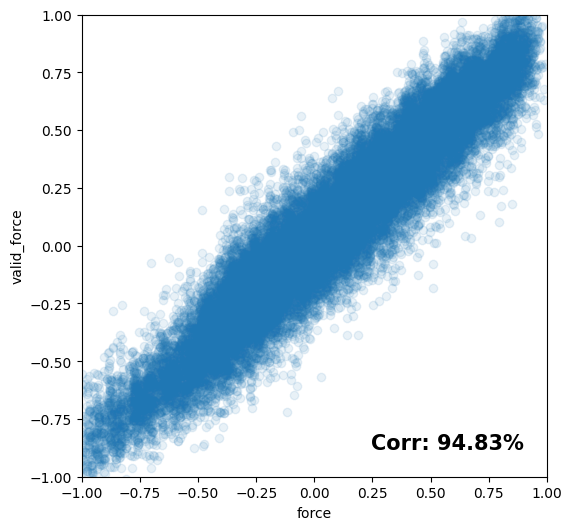

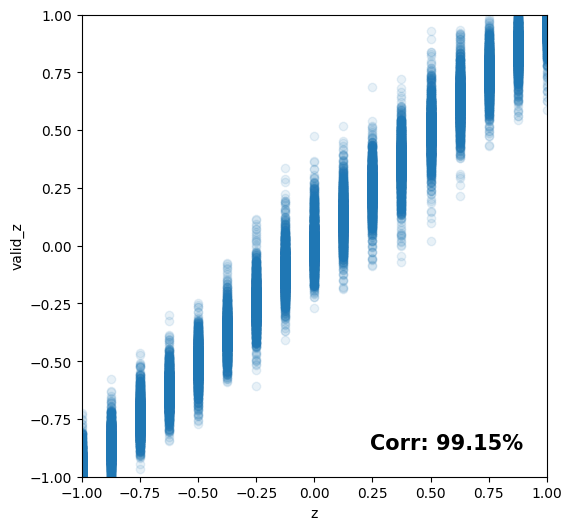

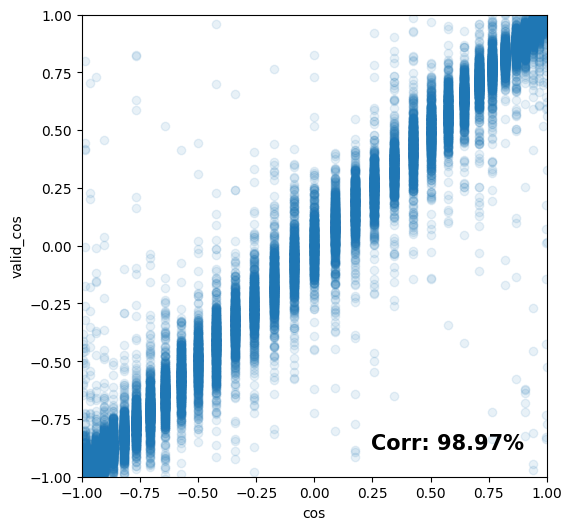

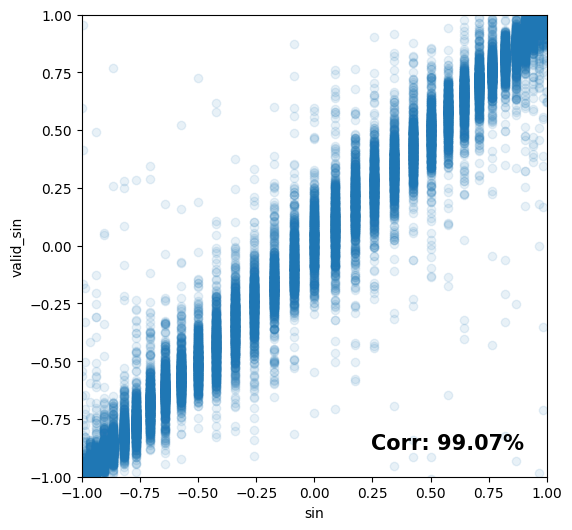

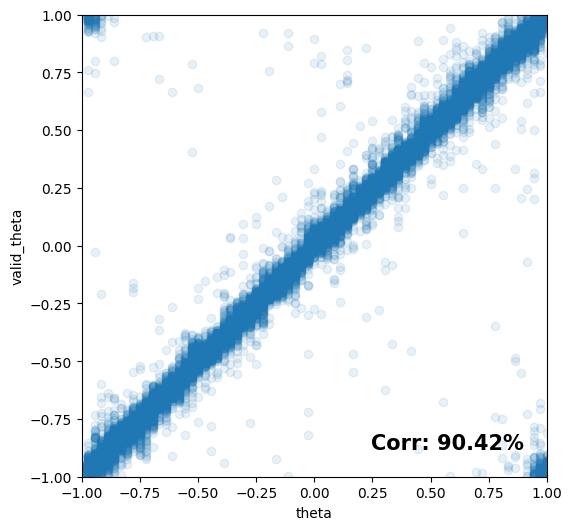

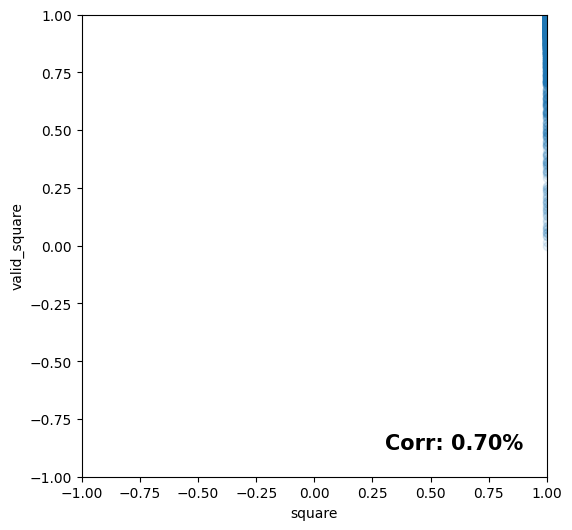

In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta','square']
#fields = ['force','z','r','cos','sin','theta']
#fields = ['z','cos','sin','theta','square']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


진행 상태: 100.00%

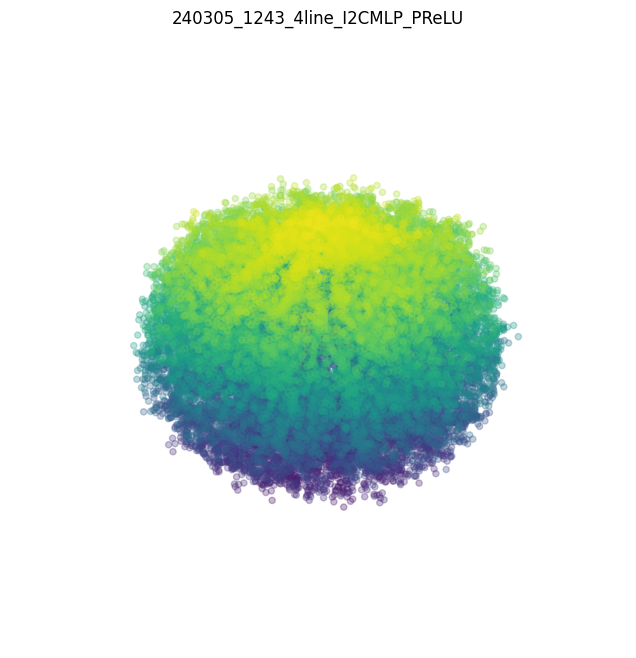

In [51]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()

# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

cmap = plt.cm.viridis
norm_z = (ValidPre['valid_z'] - ValidPre['valid_z'].min()) / (ValidPre['valid_z'].max() - ValidPre['valid_z'].min())
colors = cmap(norm_z)


# 최소값과 최대값
min_value = min_max_F[0]
max_value = min_max_F[1]

# 원래 값으로 변환
Force = ((ValidPre['valid_force']/2+0.5) * (max_value - min_value)) + min_value
cos = Force*ValidPre['valid_cos']
sin =  Force*ValidPre['valid_sin']
z = ((ValidPre['valid_z']/2+0.5) * (min_max_Z[1] - min_max_Z[0])) + min_max_Z[0] 

ax.scatter(cos, sin, z, c=colors, alpha=0.3)

# 축 레이블 및 한계 설정
ax.set_xlabel('Force*Cos(theta)')
ax.set_ylabel('Force*Sin(theta)')
ax.set_zlabel('Z')
ax.set_xlim([-max_value, max_value])
ax.set_ylim([-max_value, max_value])
ax.set_zlim([0, 160])
ax.set_title(dataname)

ax.grid(False)  # 격자 숨김
ax.set_xticks([])  # X축 눈금 숨김
ax.set_yticks([])  # Y축 눈금 숨김
ax.set_zticks([])  # Z축 눈금 숨김
ax.set_axis_off()  # 축 자체를 숨김
 

# 애니메이션 생성 및 저장
nSteps = 5
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)

ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)
ani.save(os.path.join(output_dir, f"{dataname}_3d_scatter_valid_force_color.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))

# 결과 확인
plt.show()


진행 상태: 100.00%

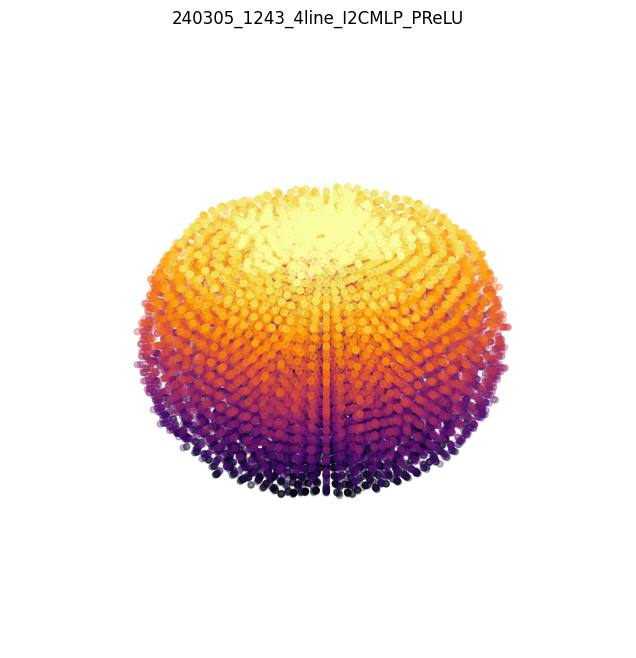

In [52]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()

# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# 'Inferno' 색상 맵 적용
cmap = plt.cm.inferno

# z 값을 0과 1 사이로 정규화
norm_z = (ValidPre['z'] - ValidPre['z'].min()) / (ValidPre['z'].max() - ValidPre['z'].min())

# 색상 맵 적용
colors = cmap(norm_z)


# 최소값과 최대값
min_value = min_max_F[0]
max_value = min_max_F[1]

# 원래 값으로 변환
Force = ((ValidPre['force']/2+0.5) * (max_value - min_value)) + min_value
cos = Force*ValidPre['cos']
sin =  Force*ValidPre['sin']
z = ((ValidPre['z']/2+0.5) * (min_max_Z[1] - min_max_Z[0])) + min_max_Z[0] 


ax.scatter(cos, sin, z, c=colors, alpha=0.3)

# 축 레이블 및 한계 설정
ax.set_xlabel('Force*Cos(theta)')
ax.set_ylabel('Force*Sin(theta)')
ax.set_zlabel('Z')
ax.set_xlim([-max_value, max_value])
ax.set_ylim([-max_value, max_value])
ax.set_zlim([0, 160])
ax.set_title(dataname)

ax.grid(False)  # 격자 숨김
ax.set_xticks([])  # X축 눈금 숨김
ax.set_yticks([])  # Y축 눈금 숨김
ax.set_zticks([])  # Z축 눈금 숨김
ax.set_axis_off()  # 축 자체를 숨김

 

# 애니메이션 생성 및 저장
nSteps = 5
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)

ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)
ani.save(os.path.join(output_dir, f"{dataname}_3d_scatter_Ref_force_color.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))

# 결과 확인
plt.show()
